In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [16]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

### Loading data into a dataframe

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [5]:
%%time
path = '2008.csv.bz2'
df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)
df.head()

Wall time: 28 s


,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


### Transposing the frame to see all features at once.

In [8]:
df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


### Examining data types of all features and total dataframe size in memory.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float16
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float16
 8   DepDelay           float16
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float16
 15  WeatherDelay       float16
 16  NASDelay           float16
 17  SecurityDelay      float16
 18  LateAircraftDelay  float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


### Getting basic statistics of each feature.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


### Counting unique Carriers and plotting their relative share of flights:

In [10]:
len(df['UniqueCarrier'].unique())

20

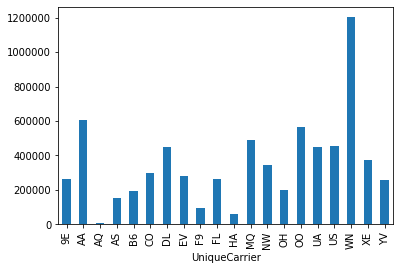

In [11]:
df.groupby('UniqueCarrier').size().plot(kind='bar');

### Finding top-3 flight codes, that have the largest total distance travelled in year 2008:

In [14]:
df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

#### Another way:

In [15]:
df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

### Number of flights by days of week and months:

In [22]:
pd.crosstab(df.Month, df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


#### Colour scheme for the previous table:

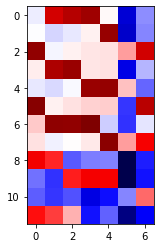

In [23]:
plt.imshow(pd.crosstab(df.Month, df.DayOfWeek),
           cmap='seismic', interpolation='none');

### Flight distance histogram:

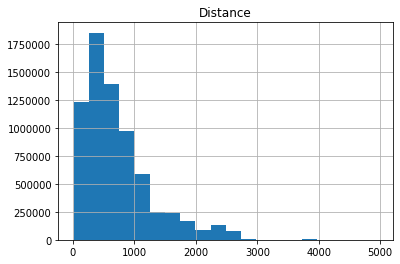

In [24]:
df.hist('Distance', bins=20);

### Making a histogram of flight frequency by date.

In [25]:
df['Date'] = pd.to_datetime(df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [26]:
num_flights_by_date = df.groupby('Date').size()

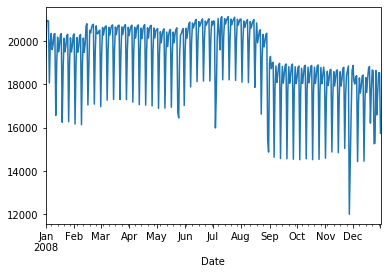

In [27]:
num_flights_by_date.plot();

#### Revealing a weekly pattern:

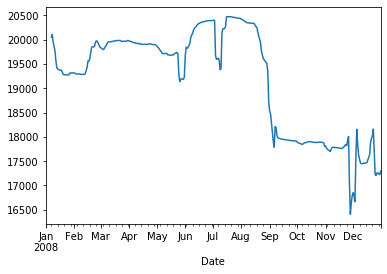

In [29]:
num_flights_by_date.rolling(window=7).mean().plot();

## The tasks:

### 1. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column):

#### Which of the listed below is not in your top-10 list?

1) DL \
2) AA \
3) OO \
4) EV 

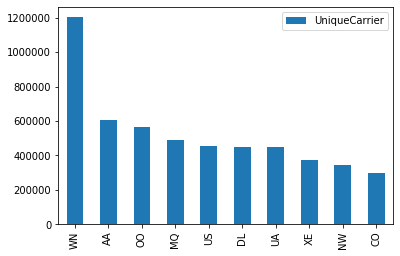

In [30]:
df['UniqueCarrier'].value_counts().to_frame()[:10].plot(kind='bar');

Answer: EV

### 2. Plot distributions of flight cancellation reasons (CancellationCode).

#### What is the most frequent reason for flight cancellation?

* carrier
* weather conditions
* National Air System
* security reasons

In [35]:
df['CancellationCode'].value_counts().to_frame()

,CancellationCode
B,54904
A,54330
C,28188
D,12


(where A - Carrier, B - Weather, C - National Air System, D - Security)

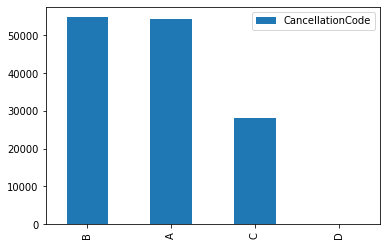

In [34]:
df['CancellationCode'].value_counts().to_frame().plot(kind = 'bar');

Answer: weather conditions 

### 3. Which route is the most frequent, in terms of the number of flights?

(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

* New-York – Washington
* San-Francisco – Los-Angeles
* San-Jose – Dallas
* New-York – San-Francisco

In [70]:
df.groupby(['Origin', 'Dest']).size().sort_values(ascending = False).head(1)

Origin  Dest
SFO     LAX     13788
dtype: int64

Answer: San-Francisco – Los-Angeles

### 4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

* 449
* 539
* 549
* 668

In [42]:
delayed_on_departure = dict(df[(df['DepDelay'] > 0)].groupby(['Origin', 'Dest']).size().sort_values(ascending = False).head()) 

In [44]:
routes = list(delayed_on_departure.keys())

In [46]:
total=0
for i in routes:
    total += len(df[(df['Origin'] == i[0]) & (df['Dest'] == i[1]) & (df['WeatherDelay'] > 0)])

total

668

Answer: 668

### 5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.

#### Choose all correct statements:

* Flights are normally distributed within time interval [0-23] 
* Flights are uniformly distributed within time interval [0-23].
* In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

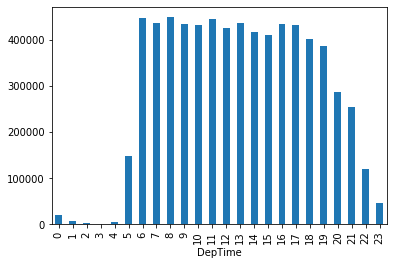

In [58]:
DepTime_noNaN = df[df['DepTime'].notna()][['DepTime','Year']]
DepTime_noNaN['DepTime'] = DepTime_noNaN.DepTime.apply(lambda x: int(x // 100) % 24)
DepTime_noNaN.groupby('DepTime').size().plot(kind='bar');

Answer: In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

### 6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.

#### Choose all correct statements:

* The number of flights during weekends is less than during weekdays (working days).
* The lowest number of flights is on Sunday.
* There are less flights during winter than during summer.

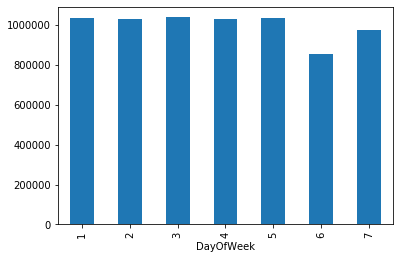

In [59]:
#weekends
df.groupby('DayOfWeek').size().plot(kind = 'bar');

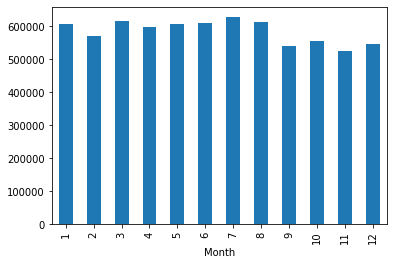

In [60]:
#months
df.groupby('Month').size().plot(kind='bar');

In [63]:
#seasons
months=dict(df['Month'].value_counts())

spring = months[3]+months[4]+months[5]
summer = months[6]+months[7]+months[8]
fall = months[9]+months[10]+months[11]
winter = months[12]+months[1]+months[2]

data = [['spring',spring],['summer',summer],['fall',fall],['winter',winter]]

pd.DataFrame(data, columns = ['Season', 'Flights'])

,Season,Flights
0,spring,1820509
1,summer,1848875
2,fall,1620385
3,winter,1719959


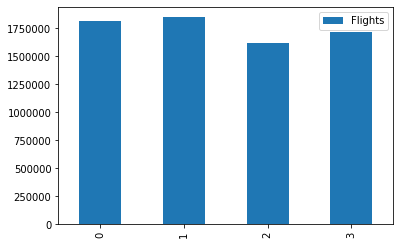

In [64]:
pd.DataFrame(data, columns = ['Season', 'Flights']).plot(kind='bar');

Answer: The number of flights during weekends is less than during weekdays (working days) AND There are less flights during winter than during summer.

### 7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

#### Choose all correct statements:

* December has the highest rate of cancellations due to weather.
* The highest rate of cancellations in September is due to Security reasons.
* April's top cancellation reason is carriers.
* Flights cancellations due to National Air System are more frequent than those due to carriers.

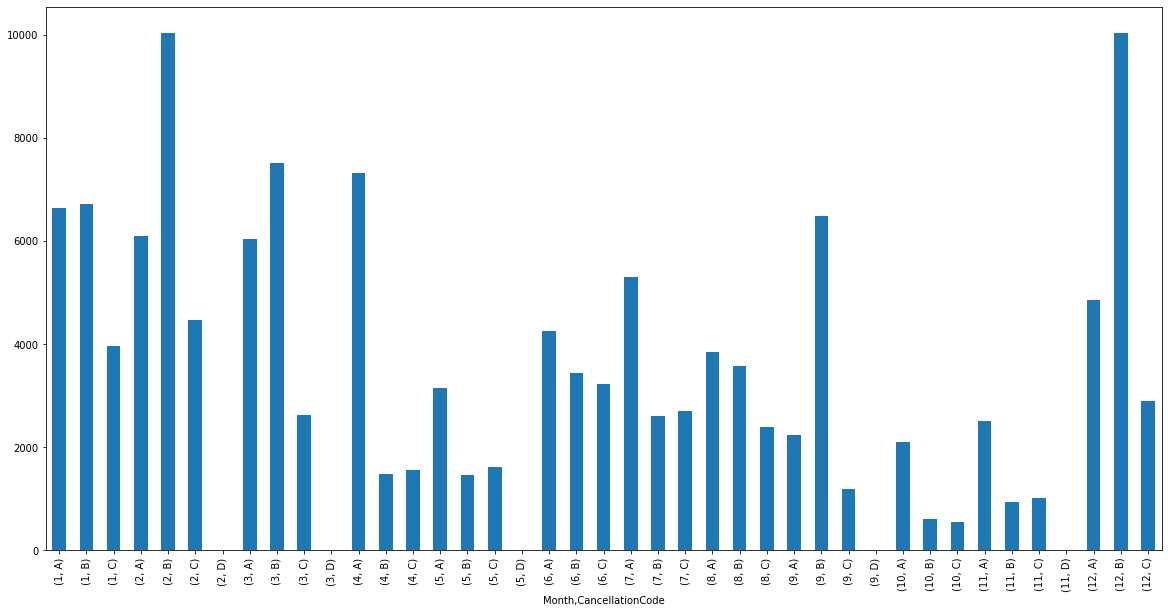

In [67]:
df.groupby(['Month', 'CancellationCode']).size().plot(kind='bar', figsize=(20, 10));

                    (where A - Carrier, B - Weather, C - National Air System, D - Security)

Answer: December has the highest rate of cancellations due to weather AND April's top cancellation reason is carriers.

### 8. Which month has the greatest number of cancellations due to Carrier?

* May
* January
* September
* April

In [69]:
df[(df['CancellationCode'] == 'A')]['Month'].value_counts().head(1)

4    7312
Name: Month, dtype: int64

Answer: April (4th month)

### 9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

* 9E
* EV
* HA
* AA

In [71]:
df[(df['CancellationCode'] == 'A') & (df['Month'] == 4)]['UniqueCarrier'].value_counts().head(1)

AA    3696
Name: UniqueCarrier, dtype: int64

Answer: AA

### 10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.

* EV
* OO
* AA
* AQ

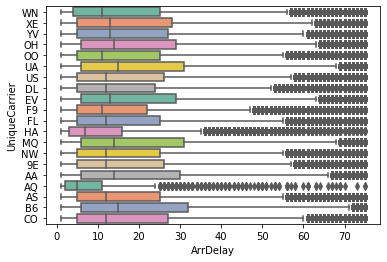

In [73]:
arr = df.loc[(df['ArrDelay'] <= df['ArrDelay'].quantile(0.95)) & (df['ArrDelay'] > 0) & (df['ArrDelay'].notna())]
dep = df.loc[(df['DepDelay'] <= df['DepDelay'].quantile(0.95)) & (df['DepDelay'] > 0) & (df['DepDelay'].notna())]

arr_id = arr['ArrDelay'].value_counts().index.values
sns.boxplot(x='ArrDelay', y='UniqueCarrier', data=df[df.ArrDelay.isin(arr_id)], palette="Set2", orient="h");

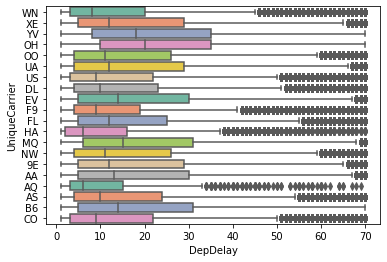

In [74]:
dep_id = dep['DepDelay'].value_counts().index.values
sns.boxplot(x='DepDelay', y='UniqueCarrier', data=df[df.DepDelay.isin(dep_id)], palette="Set2", orient="h");

Answer: AQ